In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\n train shape = ', x_train.shape, 
      ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, 
      ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력


 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [9 0 0 ... 3 0 5]
 test label  =  [9 2 1 ... 8 1 5]


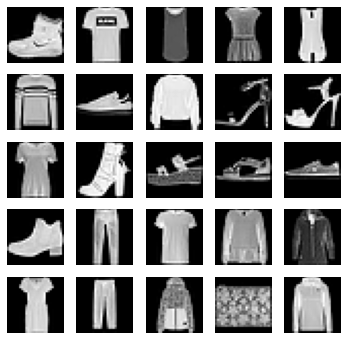

In [2]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   

plt.show()

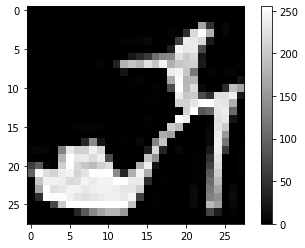

In [3]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show()

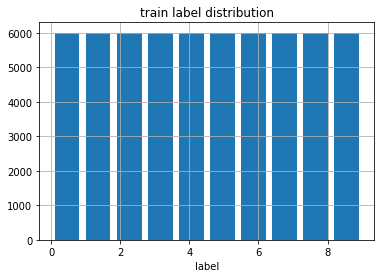

In [4]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')

plt.hist(t_train, bins=10, rwidth=0.8)

plt.show()

In [5]:
# 학습데이터 정답 분포 확인

label_distribution = np.zeros(10)

for idx in range(len(t_train)):

    label = int(t_train[idx])

    label_distribution[label] = label_distribution[label] + 1


print(label_distribution)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


In [6]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 5s 3ms/step - loss: 0.6822 - accuracy: 0.7670 - val_loss: 0.4216 - val_accuracy: 0.8511
Epoch 2/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4064 - accuracy: 0.8547 - val_loss: 0.4331 - val_accuracy: 0.8379
Epoch 3/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3556 - accuracy: 0.8708 - val_loss: 0.3635 - val_accuracy: 0.8669
Epoch 4/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3315 - accuracy: 0.8791 - val_loss: 0.3673 - val_accuracy: 0.8638
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3059 - accuracy: 0.8894 - val_loss: 0.3539 - val_accuracy: 0.8730
Epoch 6/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2931 - accuracy: 0.8905 - val_loss: 0.3403 - val_accuracy: 0.8771
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2773 - accuracy: 0.8954 - val_loss: 0.3421 - val_accuracy:

In [10]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.8810


[0.4277305603027344, 0.8809999823570251]

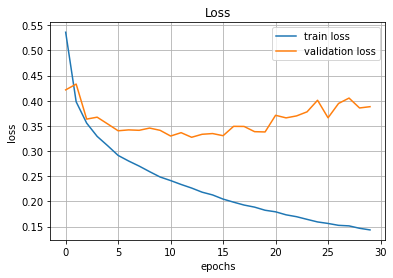

In [11]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

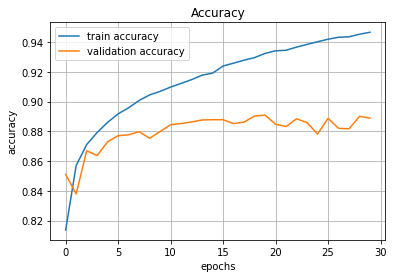

In [12]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

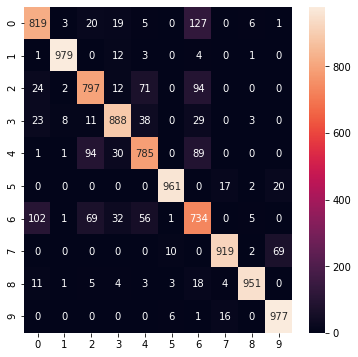

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(t_test, 
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [26]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

[[819   3  20  19   5   0 127   0   6   1]
 [  1 979   0  12   3   0   4   0   1   0]
 [ 24   2 797  12  71   0  94   0   0   0]
 [ 23   8  11 888  38   0  29   0   3   0]
 [  1   1  94  30 785   0  89   0   0   0]
 [  0   0   0   0   0 961   0  17   2  20]
 [102   1  69  32  56   1 734   0   5   0]
 [  0   0   0   0   0  10   0 919   2  69]
 [ 11   1   5   4   3   3  18   4 951   0]
 [  0   0   0   0   0   6   1  16   0 977]]


label = 0	(819/1000)	accuracy = 0.819
label = 1	(979/1000)	accuracy = 0.979
label = 2	(797/1000)	accuracy = 0.797
label = 3	(888/1000)	accuracy = 0.888
label = 4	(785/1000)	accuracy = 0.785
label = 5	(961/1000)	accuracy = 0.961
label = 6	(734/1000)	accuracy = 0.734
label = 7	(919/1000)	accuracy = 0.919
label = 8	(951/1000)	accuracy = 0.951
label = 9	(977/1000)	accuracy = 0.977


In [27]:
# 정답 및 예측 값 분포 확인
label_distribution = np.zeros(10)
prediction_distribution = np.zeros(10)

print(predicted_value.shape)
for idx in range(len(t_test)):

    label = int(t_test[idx])

    label_distribution[label] = label_distribution[label] + 1

    prediction = int(np.argmax(predicted_value[idx]))

    prediction_distribution[prediction] = prediction_distribution[prediction] + 1


print(label_distribution)
print(prediction_distribution)

(10000, 10)
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
[ 981.  995.  996.  997.  961.  981. 1096.  956.  970. 1067.]
